In [13]:
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data
y = boston.target

In [26]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder

X_scaled = scale(X)

lab_enc = LabelEncoder()
y_fixed = lab_enc.fit_transform(y)

Text(0.5, 0, 'p')

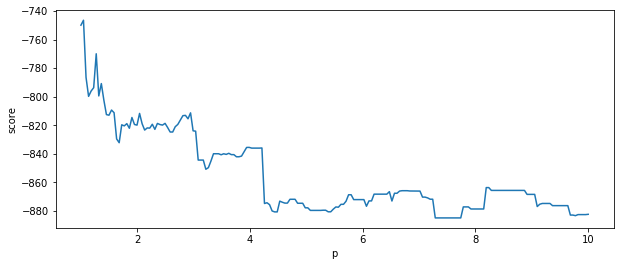

In [30]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mean_scores = []
section = np.linspace(1,10,200)
for p in section:
    clf = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='minkowski',p=p)
    scores = cross_val_score(estimator=clf, 
                             X=X_scaled, 
                             y=y_fixed, 
                             cv=kf,
                             scoring='neg_mean_squared_error',
                             error_score='raise')
    mean_scores.append(scores.mean())
    
plt.figure(figsize=(10,4))
plt.plot(section, mean_scores)
plt.ylabel("score")
plt.xlabel("p")
# optimal p = 1, score = ебала какая-то

In [39]:
max(mean_scores), mean_scores[1]

(-746.4670743544942, -746.4670743544942)